# i. Introduction

--------------------------------------------------------------------
**FINAL PROJECT**

**Nama Anggota**  :  
1. Achmad Raihan  
2. Handwitanto Abraham
3. Serina Roihaanah Mulawati
4. Stanly Sukmajaya Kwok

**Batch : RMT-036**
**GROUP 2** 

Program ini dibuat untuk mengetahui bagaimana sentimen masyarakat terhadap produk _Smartphone_ yang sudah ada dan akan segera rilis.

--------------------------------------------------------------------


# ii. Problem Background

### ii. a. Prologue

Program ini dibuat untuk membantu masyarakat dalam memilih smartphone dengan memanfaatkan analisis sentimen netizen di platform YouTube. Aplikasi ini dirancang untuk menganalisis sentimen komentar menggunakan teknik NLP (Natural Language Processing) berbasis Machine Learning atau Deep Learning.

Proses dimulai dengan pengumpulan data melalui scraping komentar pada video YouTube yang relevan dengan produk smartphone tertentu. Data tersebut akan dianalisis untuk mengidentifikasi sentimen positif, negatif, atau netral. Hasil analisis ini, beserta visualisasi berupa word cloud, akan memberikan informasi yang berguna bagi pengguna untuk memahami opini publik terhadap produk tersebut.

Aplikasi ini bertujuan untuk memberikan rekomendasi berbasis data yang membantu masyarakat dalam pengambilan keputusan pembelian smartphone. Selain itu, aplikasi ini juga memberikan wawasan tambahan dari analisis eksploratif (EDA) yang dapat digunakan untuk memahami tren opini publik secara lebih luas. Dengan pendekatan ini, diharapkan pengguna dapat mengambil keputusan yang lebih informatif, efisien, dan tepat sasaran.

### ii. b. Business Understanding

Untuk mengidentifikasi kasus yang dimiliki, maka dirancang **SMART Framework** dengan rincian sebagai berikut:

- **SPECIFIC**:  
  Berfokus pada pembuatan aplikasi untuk memudahkan masyarakat dalam memilih smartphone berdasarkan analisis sentimen netizen terhadap produk di platform YouTube.

- **MEASURABLE**:  
  Aplikasi harus mampu menganalisis sentimen dengan akurasi minimal 80% berdasarkan dataset pengujian.

- **ACHIEVABLE**:  
  Data akan diambil melalui scraping komentar pada video YouTube, kemudian diproses untuk menghasilkan analisis sentimen (positif, negatif, netral). Aplikasi juga akan menampilkan visualisasi berupa word cloud dari komentar yang dianalisis.  

- **RELEVANT**:  
  Dengan menyediakan informasi sentimen netizen, aplikasi ini akan membantu masyarakat dalam pengambilan keputusan yang lebih tepat saat membeli smartphone. Hal ini dapat meningkatkan kepercayaan pengguna terhadap produk tertentu dan menghemat waktu mereka dalam menentukan keputusan untuk membeli smartphone.  

- **TIME-BOUND**:  
  Proyek ini akan selesai dalam waktu satu minggu, termasuk pengumpulan data, pengolahan data, pengembangan model, pengujian, dan implementasi aplikasi.  

**PROBLEM STATEMENT**  
Target yang ingin dicapai adalah memberikan kemudahan bagi masyarakat dalam memilih smartphone dengan memanfaatkan opini dan sentimen netizen di YouTube. Aplikasi ini akan mengidentifikasi sentimen positif, negatif, dan netral pada komentar terkait, sehingga pengguna dapat memperoleh gambaran umum tentang pendapat publik terhadap produk tertentu.

**Objective:**  
Proyek ini bertujuan untuk:  
1. Mengembangkan aplikasi yang dapat menganalisis sentimen komentar pada video YouTube menggunakan model Machine Learning/Deep Learning berbasis NLP.  
2. Mempermudah pengguna dalam memahami opini publik dengan menampilkan hasil analisis berupa sentimen utama dan word cloud.  
3. Memberikan rekomendasi yang informatif dan berbasis data untuk membantu pengambilan keputusan pembelian smartphone.

### ii. c. Breaking Down the Problem

**Masalah utama:** `Menganalisis sentimen netizen untuk membantu masyarakat dalam memilih smartphone berdasarkan opini publik di YouTube`  

Untuk memudahkan analisis dan menyelesaikan masalah, kita perlu memahami detail tentang masalah tersebut.  

- Apakah terdapat pola tertentu dalam sentimen netizen (positif, negatif, atau netral) yang dapat memberikan gambaran tentang keunggulan atau kekurangan smartphone tertentu?  

- Fitur apa saja dalam teks komentar, seperti frekuensi kata, konteks kalimat, atau emosi tertentu, yang paling mempengaruhi analisis sentimen terhadap sebuah produk?  

- Apa rekomendasi yang dapat diberikan kepada masyarakat berdasarkan hasil analisis sentimen dan visualisasi (misalnya, word cloud) untuk membantu mereka membuat keputusan pembelian yang lebih baik?  

# iii. Import Libraries

Bagian ini berfungsi untuk menyimpan library yang akan digunakan dalam mengeksekusi sintaks.

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import re

import json


# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter

import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE


import gensim
from gensim.models import KeyedVectors
print("Gensim imported successfully")

from imblearn.over_sampling import RandomOverSampler

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import layers, Input, Model


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\handw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Gensim imported successfully


c:\Users\handw\anaconda3\envs\tf-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-------------------

# iv. Data Loading

Bagian ini berfungsi untuk melakukan loading data yang akan digunakan dalam analisa. Dalam proyek ini, terdapat dua dataset yang akan digunakan yaitu dataset utama dan dataset pendukung. Dataset utama berisi data yang akan digunakan dalam membangun model, sedangkan dataset pendukung akan digunakan untuk deployment aplikasi yang memberikan informasi mengenai spesifikasi dari smartphone.

## iv.a. Main Dataset

In [3]:
#Load Dataset
df_ori = pd.read_csv('final_dataset4.csv')

#duplicate
df = df_ori.copy()

Setelah data di load, berikut adalah tampilan data untuk 10 baris teratas.

In [4]:
df.sample(n=20).head(10)

,author,id,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date
2906,@pgc6290,2907,Galaxy terdengar bagus.,positive,2024-11-05T07:21:19Z,1,Galaxy S25 Slim,Samsung,Flagship,Mid-2025
2583,@ryanherjunot4139,2584,"Gua salah satu pecinta asus, tapi sayangnya ma...",negative,2024-07-09T17:40:43Z,1,ASUS Zenfone 11 Ultra,ASUS,Flagship,2024
1272,@edniskandar,1273,Linknya om,neutral,2024-10-06T09:23:53Z,0,Google Pixel 9,Google,Flagship,2024
1964,@MeongOyenBar2,1965,Hardware udah bagus tp desain belakangnya msh ...,negative,2024-11-09T02:55:15Z,0,Xiaomi 15,Xiaomi,Flagship,2025
253,@trisetiawan9945,254,Salfok sama logo hires audio nya,negative,2024-07-21T04:37:40Z,0,ASUS Zenfone 11 Ultra,ASUS,Flagship,2024
2728,@noonajinjin,2729,1080p,positive,2024-10-21T15:09:02Z,1,OPPO A3x,OPPO,Entry-Level,2024
1475,@lenafebriana8177,1476,"Hp baru di getok""¢ apalah dayaku yg pegang hp ...",negative,2024-11-08T21:30:49Z,0,iPhone 16,Apple,Flagship,24-Oct
2070,@CommentGuard717,2071,Dengan kernel khusus saya bisa mengalahkan 888...,positive,2024-06-04T21:35:12Z,0,Pixel 10,Google,Flagship,25-Oct
1441,@ibad0405,1442,"percuma kalau bawa ke indo, ilegal...",negative,2024-11-12T10:16:24Z,0,iPhone 16,Apple,Flagship,24-Oct
933,@nysschannel7959,934,"Plis bingung bngt beli samsung a54 atau ini, s...",negative,2024-10-13T21:53:12Z,0,Vivo V40,Vivo,Mid-Range,24-Aug


Berikut adalah 10 data terakhir dari dataset.

In [5]:
df.sample(n=10).tail(10)

,author,id,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date
2304,@xavierrobinson200,2305,Saya rasa tidak ada yang menginginkan ponsel t...,positive,2024-11-10T15:17:24Z,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025
2756,@maddrybspnmaddry3587,2757,Selamat kalian tim creator menjadi DPO karna I...,neutral,2024-11-11T17:29:33Z,1,iPhone 16,Apple,Flagship,24-Oct
1119,@AlBos-p2m,1120,Antara redmi 13c SM Oppo 3x LBH enak mn bang,positive,2024-10-09T14:45:05Z,0,OPPO A3x,OPPO,Entry-Level,2024
660,@genovevakarlinahegi3176,661,Bg saya baru beli readmi note 12 pro tapi carg...,negative,2024-09-30T07:43:26Z,0,Redmi Note 13 Pro 5G,Xiaomi,Mid-Range,24-Feb
2381,@Dk-qf8dd,2382,Daftarkan saya! Saya suka ketebalan Honor V2 s...,positive,2024-11-04T01:07:37Z,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025
1586,@Nugroho_adhii,1587,Coba Ada GMS nya pasti laku keras,positive,2024-07-24T04:15:39Z,0,Huawei Pura 70 Ultra,Huawei,Flagship,18-Apr-24
3307,@omarsalim9562,3308,Kami ingin baterai besar,neutral,2024-11-04T12:34:28Z,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025
2693,@sherlycious5790,2694,Bismillah mau beli­,positive,2024-06-16T17:02:47Z,1,Infinix Zero 30,Infinix,Mid-Range,24-Aug
2875,@6025094,2876,Snapdragon atau tidak sama sekali.,negative,2023-07-28T08:48:56Z,1,Pixel 10,Google,Flagship,25-Oct
2730,@TaryNkn_94,2731,"Mending ambil oppo reno, udh ada slowmoot nya....",positive,2024-10-07T04:38:02Z,1,OPPO A3x,OPPO,Entry-Level,2024


## iv.b. Complementary Dataset

In [6]:
#Load Dataset
df_ori_spec = pd.read_csv('spesifikasi_dataset.csv', sep=';')

#duplicate
df_spec = df_ori_spec.copy()

In [7]:
df_spec.head()

,model,merek,segmen,bulan_rilis,tahun_rilis,range_harga,ram,storage,os,cpu,baterai,warna_tersedia,kamera_depan,kamera_belakang,ukuran_layar,dimensi
0,Galaxy S24,Samsung,Flagship,Januari,2024,Rp 12.000.000 - Rp 14.000.000,8 GB,128GB / 256GB,Android 14,Snapdragon 8 Gen 3,4.000 mAh,"Onyx Black, Marble Grey, Cobalt Violet, Amber ...",12 MP,50 MP + 10 MP (telefoto) + 12 MP,"6,1 inci","147,9 x 70,6 x 7,6 mm"
1,Galaxy S24+,Samsung,Flagship,Januari,2024,Rp 14.000.000 - Rp 16.000.000,8 GB,128GB / 256GB,Android 14,Snapdragon 8 Gen 3,4.900 mAh,"Onyx Black, Marble Grey, Cobalt Violet, Amber ...",12 MP,50 MP + 10 MP (telefoto) + 12 MP,"6,6 inci","158,5 x 75,9 x 7,7 mm"
2,Galaxy S24 Ultra,Samsung,Flagship,Januari,2024,Rp 18.000.000 - Rp 20.000.000,12 GB,256GB / 512GB,Android 14,Snapdragon 8 Gen 3,5.000 mAh,"Titanium Black, Titanium Gray, Titanium Violet...",12 MP,200 MP + 12 MP (ultrawide) + 10 MP (telefoto) ...,"6,8 inci","163,4 x 78,1 x 8,9 mm"
3,Galaxy A06,Samsung,Entry-Level,September,2024,Rp 2.000.000 - Rp 2.500.000,4 GB,64GB / 128GB,Android 14,Exynos 850,5.000 mAh,"Hitam, Biru, Merah",5 MP,13 MP + 2 MP,"6,5 inci","164,0 x 75,9 x 9,1 mm"
4,Realme 12 5G,Realme,Mid-Range,Oktober,2024,Rp 3.500.000 - Rp 4.000.000,8 GB,128GB / 256GB,Android 14,MediaTek Dimensity 6100+ 5G,5.000 mAh,"Biru, Hitam",16 MP,50 MP + 2 MP,"6,72 inci","165,5 x 76,0 x 8,1 mm"


In [8]:
df_spec.tail()

,model,merek,segmen,bulan_rilis,tahun_rilis,range_harga,ram,storage,os,cpu,baterai,warna_tersedia,kamera_depan,kamera_belakang,ukuran_layar,dimensi
36,Xiaomi 15 Pro,Xiaomi,Flagship,Oktober,2025,Rp 12.000.000 - Rp 14.000.000,12 GB,512 GB,MIUI 15 (berbasis Android 14),Snapdragon 8 Gen 3,5.100 mAh,"Hitam, Putih, Biru",32 MP,200 MP + 12 MP + 10,"6,73 inci",161.3 x 75.3 x 8.4 mm
37,Redmi Note 14 Series,Xiaomi,Mid-Range,-,2025,Rp 2.500.000 - Rp 5.000.000,"6 GB, 8 GB, 12 GB","128 GB, 256 GB, 512 GB",MIUI 15 (berbasis Android 14),MediaTek Dimensity 7025-Ultra / Dimensity 7300...,5.000 mAh - 5.500 mAh,"Hitam, Putih, Biru",16 MP,50 MP + 8 MP + 2 MP / 108 MP + 12 MP + 5 MP,"6,67 inci","165,3 x 76,2 x 8,0 mm"
38,Realme 13 Series,Realme,Mid-Range,-,2025,Rp 3.000.000 - Rp 5.500.000,"6 GB, 8 GB, 12 GB","128 GB, 256 GB, 512 GB",Realme UI 5.0 (berbasis Android 14),MediaTek Dimensity 7200 / Dimensity 8000 / Dim...,5.000 mAh,"Hitam, Biru, Hijau",16 MP,64 MP + 8 MP + 2 MP / 108 MP + 8 MP + 2 MP / 2...,"6,5 inci - 6,7 inci","162,5 x 74,8 x 8,1 mm - 163,9 x 75,8 x 8,2 mm"
39,OPPO Find X7,OPPO,Flagship,-,2025,Rp 12.000.000 - Rp 14.000.000,12 GB,"256 GB, 512 GB",ColorOS 14 (berbasis Android 14),Snapdragon 8 Gen 3,4.800 mAh,"Hitam, Putih, Biru",32 MP,50 MP + 50 MP + 13 MP,"6,8 inci","164,8 x 74,2 x 8,0 mm"
40,Huawei Pura 80 Ultra,Huawei,Mid-Range,April,2025,Rp 8.000.000 - Rp 9.000.000,12 GB,"256 GB, 512 GB",HarmonyOS 4.0,Kirin 9000,5.000 mAh,"Hitam, Putih, Biru",32 MP,200 MP + 12 MP + 8 MP,"6,8 inci","163,9 x 76,2 x 8,1 mm"


-------------------

# v. Exploratory Data Analysis

Dalam bagian ini akan mencakup dua hal, yaitu pemeriksaan karakteristik data dan deskripsi data secara statistik. EDA akan dilakukan terhadap dua dataset yaitu dataset utama dan dataset pendukung.

## MAIN DATASET

### v.a. Data Characteristic

Pada bagian ini akan dilakukan validasi data untuk memastikan bahwa data sesuai dengan aturan, format, atau standar tertentu dengan melakukan cek data duplikat, missing value, serta tipe data yang sesuai.

#### v.a.1. Data Type Checking

Pada bagian ini akan dilakukan pemeriksaan terhadap tipe data setiap kolom.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        3322 non-null   object
 1   id            3322 non-null   int64 
 2   comment       3322 non-null   object
 3   sentiment     3322 non-null   object
 4   timestamp     3322 non-null   object
 5   like_count    3322 non-null   int64 
 6   tipe_produk   3322 non-null   object
 7   brand         3322 non-null   object
 8   segment       3322 non-null   object
 9   release_date  3322 non-null   object
dtypes: int64(2), object(8)
memory usage: 259.7+ KB


Dari informasi tersebut terlihat bahwa dalam dataset ini terdapat sebanyak 3322 data dan 9 kolom dengan keseluruhan kolom bertipe object atau string. Adapun terdapat missing value pada kolom `sentiment` dan `release_date` yang ditandai dengan adanya perbedaan jumlah baris non-null dengan entri data. 

Selanjutnya akan dilakukan penyesuaian terhadap tipe data yaitu pada kolom `like_count` akan diubah ke dalam tipe numerik dan untuk kolom `timestamp` akan diubah ke dalam tipe datetime.


In [10]:
#Ubah tipe data
df['like_count'] = pd.to_numeric(df['like_count'], errors='coerce')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   author        3322 non-null   object             
 1   id            3322 non-null   int64              
 2   comment       3322 non-null   object             
 3   sentiment     3322 non-null   object             
 4   timestamp     3322 non-null   datetime64[ns, UTC]
 5   like_count    3322 non-null   int64              
 6   tipe_produk   3322 non-null   object             
 7   brand         3322 non-null   object             
 8   segment       3322 non-null   object             
 9   release_date  3322 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 259.7+ KB


Setelah dilakukan penyesuaian, kolom `timestamp` dan `like_count` telah sesuai dengan tipe yang seharusnya.

#### v.a.2. Duplicate Checking

Pada bagian ini akan dilakukan pemeriksaan apakah dataset memiliki data duplikat atau tidak

In [11]:
df.duplicated().sum()

0

Diketahui bahwa dalam dataset ini tidak terdapat data duplikat.

#### v.a.3. Missing Value Checking

Pada bagian ini akan dilakukan pemeriksaan apakah dalam dataset terdapat missing value atau tidak.

In [12]:
df.isnull().sum()

author          0
id              0
comment         0
sentiment       0
timestamp       0
like_count      0
tipe_produk     0
brand           0
segment         0
release_date    0
dtype: int64

Dari informasi yang tertampil, pada dataset ini terdapat 1 kolom yang memiliki missing value di dalamnya yaitu kolom `sentiment` dengan 2 nilai missing. Pada data missing ini akan dilakukan penanganan saat melakukan Feature Engineering dengan metode yang sesuai karakteristik data.

### v.b. Descriptive Statistical Analysis

In [13]:
df_eda = df.copy()

#### v.b.1. Sentiment Distribution

Bagian ini berfungsi untuk menampilkan bagaimana distribusi dari `sentiment`.

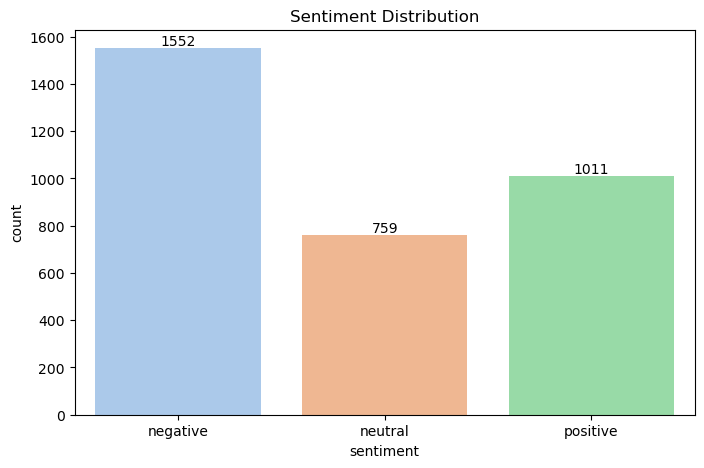

In [14]:
# Create canvas
plt.figure(figsize=(8, 5))
        
# Countplot
sns.countplot(x=df_eda.sentiment, palette='pastel')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Sentiment Distribution')
plt.show()


Berdasarkan grafik ini, dapat diketahui bahwa dalam kolom `sentiment` terdapat 3 label diantaranya adalah Negative, Positive, dan Neutral. Kategori sentimen dengan jumlah tertinggi ialah Negative. Hal ini menandakan bahwa komentar netizen pada platform YouTube terkait dengan produk smartphone yang ada dalam dataset ini cenderung negatif daripada positif atau netral. Dari grafik tersebut juga dapat dilihat bahwa ada kecenderungan imbalance meskipun perbedaan yang nampak tidak terlalu jauh. Imbalance ini akan dilakukan penanganan pada Feature Engineering atau preprocessing data sebelum dilakukan modeling.

#### v.b.2. Comments Distribution

Sebelum menganalisis sentimen komentar, kita perlu memahami beberapa metrik dasar dari komentar, seperti jumlah kata, kalimat, stop words, panjang rata-rata kata, jumlah karakter, dan tanda baca. Analisis distribusi komentar ini akan memberikan gambaran tentang kompleksitas dan variasi dalam komentar. Hal ini penting untuk interpretasi lebih lanjut dan pemahaman pola komentar pengguna.

In [15]:
# Stopwords in indonesian
stop_words_id = set(stopwords.words('indonesian'))
print(stop_words_id)


{'apabila', 'memberikan', 'kedua', 'pula', 'semisal', 'mulailah', 'menurut', 'mendatang', 'terdiri', 'agar', 'ataupun', 'begitulah', 'mengira', 'sebaik-baiknya', 'andalah', 'sebetulnya', 'saat', 'beberapa', 'sangat', 'sudah', 'di', 'mengatakan', 'sepertinya', 'tanyakan', 'menantikan', 'keseluruhannya', 'sering', 'menunjukkan', 'diperkirakan', 'dimulai', 'keduanya', 'sekali', 'bagai', 'seolah-olah', 'sepanjang', 'benarkah', 'mau', 'sehingga', 'ia', 'jumlahnya', 'tanpa', 'inikah', 'buat', 'sudahkah', 'jangankan', 'sekaligus', 'semampunya', 'semata-mata', 'tegas', 'terakhir', 'ujar', 'teringat-ingat', 'waktu', 'membuat', 'meyakinkan', 'kelihatan', 'kelamaan', 'para', 'namun', 'betul', 'dijelaskan', 'selalu', 'lagi', 'semuanya', 'dipergunakan', 'secukupnya', 'mengibaratkannya', 'waktunya', 'atas', 'belumlah', 'sesuatu', 'boleh', 'besar', 'diri', 'berakhir', 'kalaupun', 'bertanya', 'didapat', 'melihat', 'memberi', 'dimulailah', 'tentu', 'sebaik', 'jadinya', 'seusai', 'begitukah', 'diketahui

In [16]:
# word_count
df_eda['word_count'] = df_eda['comment'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# sentence_count
df_eda['sentence_count'] = df_eda['comment'].apply(lambda x: len(sent_tokenize(x)) if pd.notnull(x) else 0)

# stop_word_count
df_eda['stop_word_count'] = df_eda['comment'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words_id]))

# char_count
df_eda['char_count'] = df_eda['comment'].apply(lambda x: len(str(x)))

# mean_word_length
df_eda['mean_word_length'] = df_eda['comment'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# punctuation_count
df_eda['punctuation_count'] = df_eda['comment'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


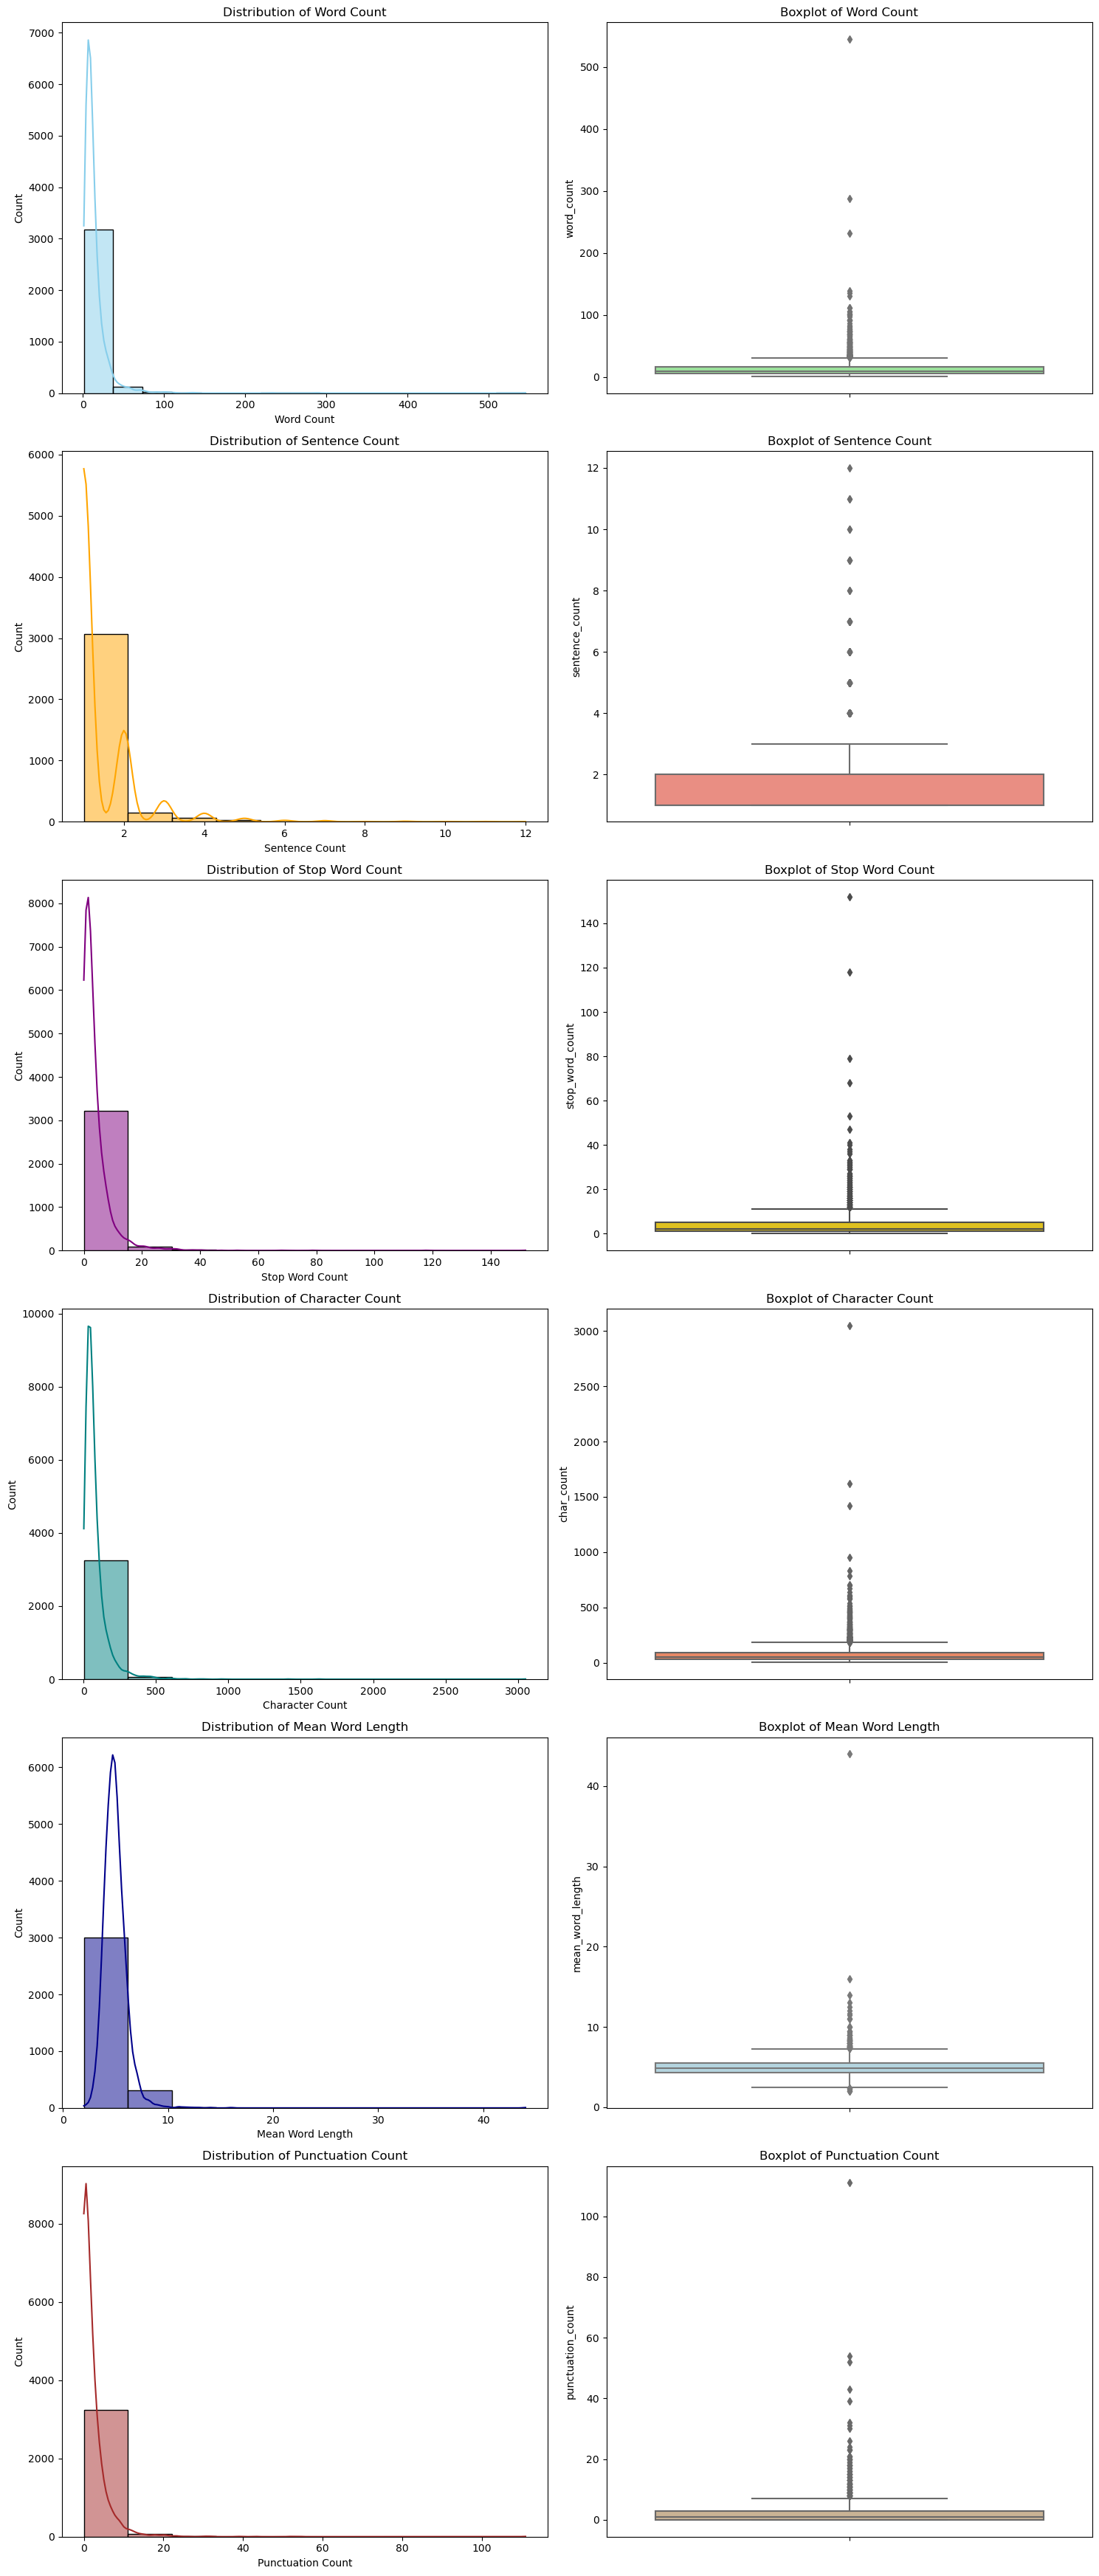

In [17]:
# Create canvas
plt.figure(figsize=(15, 35))

# Plot histogram for word_count
plt.subplot(6, 2, 1)
sns.histplot(df_eda['word_count'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')

# Plot boxplot for word_count
plt.subplot(6, 2, 2)
sns.boxplot(y=df_eda['word_count'], color='lightgreen')
plt.title('Boxplot of Word Count')

# Plot histogram for sentence_count
plt.subplot(6, 2, 3)
sns.histplot(df_eda['sentence_count'], kde=True, bins=10, color='orange')
plt.title('Distribution of Sentence Count')
plt.xlabel('Sentence Count')

# Plot boxplot for sentence_count
plt.subplot(6, 2, 4)
sns.boxplot(y=df_eda['sentence_count'], color='salmon')
plt.title('Boxplot of Sentence Count')

# Plot histogram for stop_word_count
plt.subplot(6, 2, 5)
sns.histplot(df_eda['stop_word_count'], kde=True, bins=10, color='purple')
plt.title('Distribution of Stop Word Count')
plt.xlabel('Stop Word Count')

# Plot boxplot for stop_word_count
plt.subplot(6, 2, 6)
sns.boxplot(y=df_eda['stop_word_count'], color='gold')
plt.title('Boxplot of Stop Word Count')

# Plot histogram for char_count
plt.subplot(6, 2, 7)
sns.histplot(df_eda['char_count'], kde=True, bins=10, color='teal')
plt.title('Distribution of Character Count')
plt.xlabel('Character Count')

# Plot boxplot for char_count
plt.subplot(6, 2, 8)
sns.boxplot(y=df_eda['char_count'], color='coral')
plt.title('Boxplot of Character Count')

# Plot histogram for mean_word_length
plt.subplot(6, 2, 9)
sns.histplot(df_eda['mean_word_length'], kde=True, bins=10, color='darkblue')
plt.title('Distribution of Mean Word Length')
plt.xlabel('Mean Word Length')

# Plot boxplot for mean_word_length
plt.subplot(6, 2, 10)
sns.boxplot(y=df_eda['mean_word_length'], color='lightblue')
plt.title('Boxplot of Mean Word Length')

# Plot histogram for punctuation_count
plt.subplot(6, 2, 11)
sns.histplot(df_eda['punctuation_count'], kde=True, bins=10, color='brown')
plt.title('Distribution of Punctuation Count')
plt.xlabel('Punctuation Count')

# Plot boxplot for punctuation_count
plt.subplot(6, 2, 12)
sns.boxplot(y=df_eda['punctuation_count'], color='tan')
plt.title('Boxplot of Punctuation Count')

# Adjust layout and show
plt.tight_layout()
plt.show()


Secara visual, dari seluruh grafik ini dapat diketahui sebagai berikut.

1. **Word Count**  
    - Sebagian besar teks memiliki jumlah kata yang relatif sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-100.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang.
2. **Sentence Count**  
    - Sebagian besar teks memiliki jumlah kalimat yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 2-3 kalimat.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang. 
3. **Stop Word Count**  
    - Sebagian besar teks memiliki jumlah kata stop word yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-20 kata stop word. Hal ini menunjukkan bahwa banyak teks dalam dataset yang cenderung memiliki sedikit kata-kata tidak memiliki makna substansial (seperti "dan", "atau", "yang", dll.).
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang dan mengandung banyak kata stop word.  
4. **Character Count**   
    - Sebagian besar teks memiliki jumlah karakter yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-500 karakter.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang.    
5. **Mean Word Length**  
    - Sebagian besar teks memiliki panjang kata rata-rata yang relatif pendek yang ditandai dengan puncak distribusi berada di sekitar rentang 5-7 karakter. Hal ini menunjukkan bahwa banyak kata dalam dataset cenderung pendek.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang memiliki kata-kata dengan panjang rata-rata yang jauh lebih panjang dari rata-rata keseluruhan.
6. **Punctiation Count**  
    - Sebagian besar teks memiliki jumlah tanda baca yang sedikit yang ditandai dengan puncak distribusi berada di sekitar rentang 0-20 tanda baca.
    - Terdapat banyak outlier yang menandakan ada sebagian komentar yang sangat panjang dan mengandung tanda baca.        

#### v.b.3. Word Frequency Analysis

Pada bagian ini akan dilakukan analisa terhadap kata-kata yang paling sering muncul dalam komentar. Analisis frekuensi kata ini akan mengungkapkan kata-kata dominan dalam dataset untuk membantu dalam mengenali tema yang sering dibahas oleh pengguna. Berikut adalah analisa untuk kata tunggal.

In [18]:
# CountVectorizer for unigram
stop_words_as_list = list(stop_words_id)
vectorizer = CountVectorizer(stop_words=stop_words_as_list, ngram_range=(1, 1))  # Unigrams
X = vectorizer.fit_transform(df_eda['comment'])
unigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_uni = unigram_freq.sum(axis=0).sort_values(ascending=False)

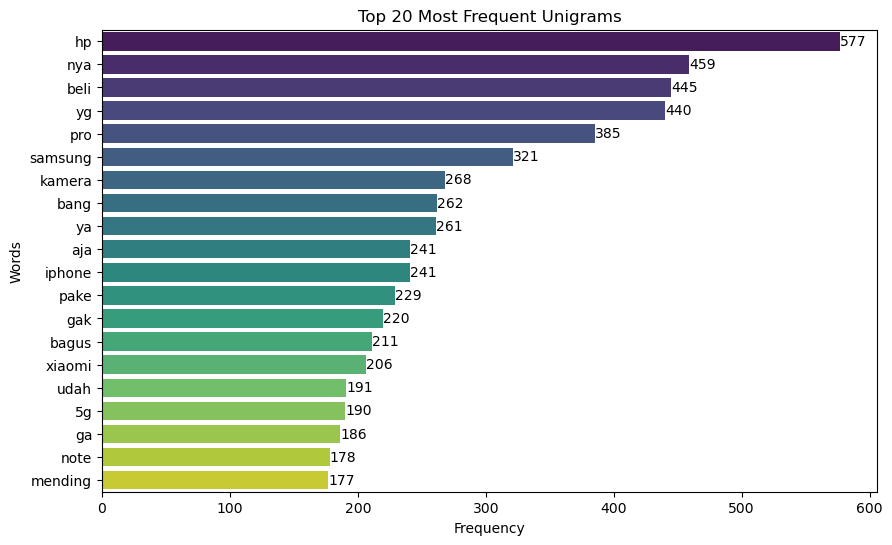

In [19]:
# Plot top 20 most frequent words
top_words = word_freq_uni.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')

for index, value in enumerate(top_words.values):
    plt.text(value, index, str(value), va='center')

plt.title('Top 20 Most Frequent Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Dapat terlihat bahwa 20 kata yang sering muncul dalam komentar adalah seperti pada output diatas. Selanjutnya kita akan melihat bagaimana hasil untuk pasangan dua kata.

In [20]:
# CountVectorizer for bigram
vectorizer = CountVectorizer(stop_words=stop_words_as_list, ngram_range=(2, 2))  # Bigram
X = vectorizer.fit_transform(df_eda['comment'])
bigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_bi = bigram_freq.sum(axis=0).sort_values(ascending=False)


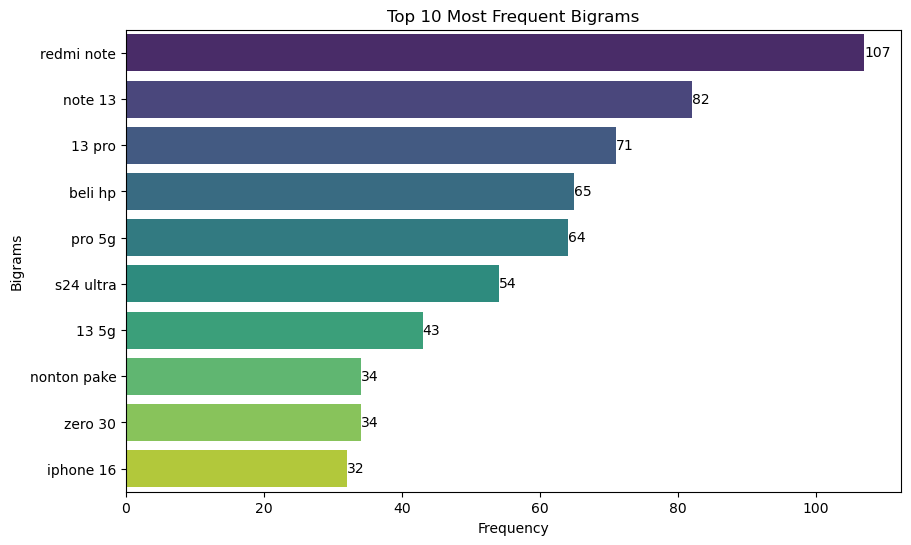

In [21]:
# Plot top 10 most frequent Bigram
plt.figure(figsize=(10, 6))

top_bigrams = word_freq_bi.head(10)

barplot = sns.barplot(x=top_bigrams.values, y=top_bigrams.index, palette='viridis')

for index, value in enumerate(top_bigrams.values):
    plt.text(value, index, str(value), va='center')  # Teks frekuensi di tengah batang

plt.title('Top 10 Most Frequent Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


Dari grafik ini, kita dapat menarik beberapa kesimpulan:
- Berdasarkan bigram yang paling sering muncul, seperti "redmi note", "note 13", "s24 ultra", dan "iphone 16", dapat disimpulkan bahwa teks-teks dalam kumpulan data ini banyak membahas tentang produk smartphone. Hal ini berarti smartphone menjadi topik utama dalam dataset.
- Bigram seperti "beli hp" menunjukkan bahwa banyak pengguna yang sedang mencari informasi atau membandingkan produk untuk membeli ponsel baru.
- Kombinasi seperti "pro 5g" dan "13 5g" mengindikasikan bahwa fitur 5G merupakan salah satu spesifikasi yang banyak dicari oleh konsumen.
- Merek seperti Redmi, Samsung (S24), dan iPhone mendominasi komentar. Hal ini menunjukkan bahwa merek-merek tersebut memiliki popularitas yang tinggi di kalangan konsumen.
- danya bigram seperti "note 13" dan "13 pro" menunjukkan bahwa konsumen sering membandingkan berbagai model dari merek yang sama.
- Penggunaan kata "nonton pake" menunjukkan bahwa teks-teks ini mungkin berasal dari percakapan sehari-hari yang bersifat informal.

#### v.b.4. Wordcloud

Pada bagian ini, kita akan memanfaatkan word cloud untuk mengidentifikasi kata-kata yang paling dominan dalam komentar. Ini akan memberikan gambaran visual yang jelas mengenai topik atau tema yang sering dibahas oleh pengguna. Dengan menggunakan word cloud, kita dapat dengan mudah melihat kata-kata yang menonjol dan lebih memahami fokus utama dalam komentar yang terkandung dalam dataset.

##### All Comments

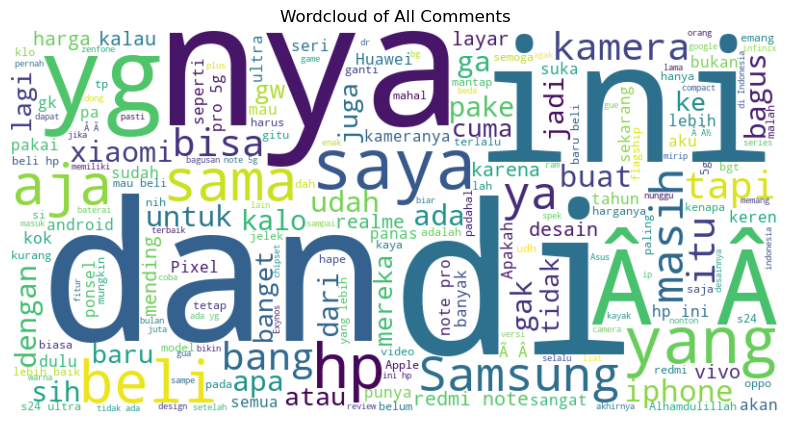

In [22]:
# Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(df_eda['comment']))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of All Comments")
plt.show()


Dari wordcloud tersebut, dapat disimpulkan beberapa hal sebagai berikut.

- Berdasarkan kata-kata yang paling sering muncul seperti "hp", "beli", "samsung", "xiaomi", "kamera", dan "harga", dapat disimpulkan bahwa topik utama dari komentar-komentar ini adalah smartphone.
- Merek seperti Samsung, Xiaomi, Oppo, dan Realme sering disebutkan, menunjukkan bahwa merek-merek ini cukup populer dan menjadi topik pembicaraan.
- Kata-kata seperti "kamera", "layar", "baterai", dan "desain" menunjukkan bahwa konsumen sangat memperhatikan fitur-fitur tersebut ketika memilih ponsel.
- Meskipun wordcloud tidak secara eksplisit menunjukkan sentimen positif atau negatif, namun kata-kata seperti "bagus", "keren", dan "mantap" mengindikasikan adanya sentimen positif terhadap produk-produk yang dibahas. Sebaliknya, kata-kata seperti "jelek", "kurang", dan "masalah" bisa mengindikasikan adanya sentimen negatif.
- Adanya banyak perbandingan antara merek dan model ponsel yang berbeda, seperti "samsung vs xiaomi", "note vs pro", dan sebagainya. Hal ini menunjukkan bahwa konsumen sering melakukan riset sebelum membeli ponsel.

Selanjutnya kita akan melihat bagaimana wordcloud untuk masing-masing kategori atau label sentimen.

##### Each Sentiment Category

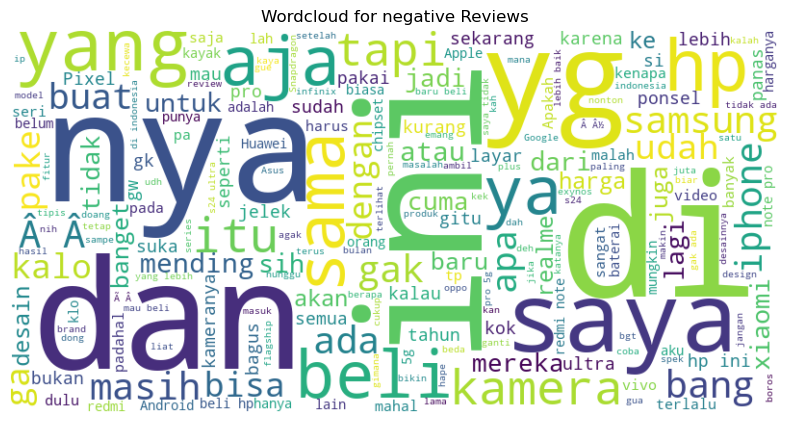

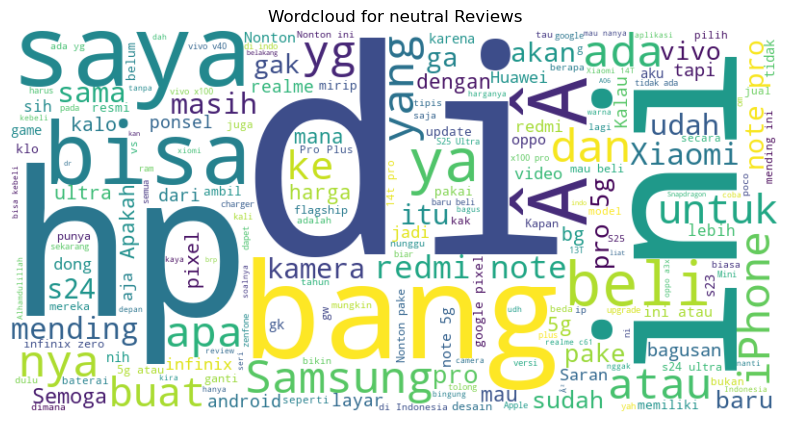

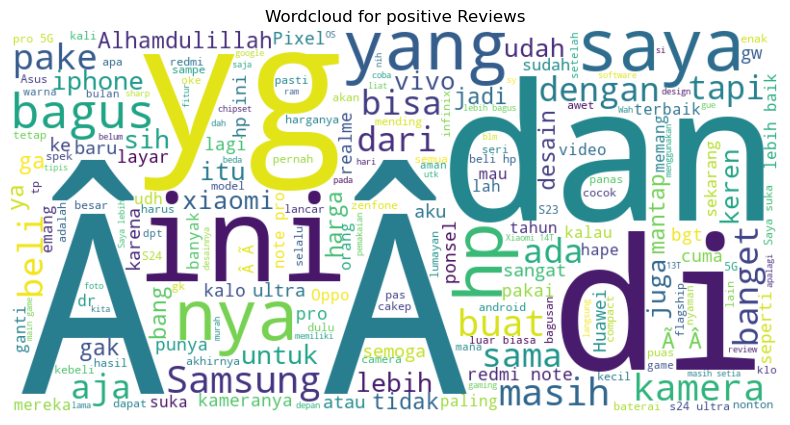

In [23]:
# Function to generate a wordcloud
def generate_wordcloud(data, sentiment):
    # Ambil komentar untuk sentimen tertentu
    sentiment_data = data[data['sentiment'] == sentiment]['comment'].dropna()

    # Periksa apakah ada komentar untuk sentimen ini
    if len(sentiment_data) == 0:
        print(f"No comments available for sentiment: {sentiment}")
        return  # Melewatkan jika tidak ada komentar

    # Gabungkan komentar menjadi satu string
    text_data = " ".join(sentiment_data)

    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud for {sentiment} Reviews")
    plt.show()

# Wordclouds per sentiment category
for sentiment in df_eda['sentiment'].unique():
    generate_wordcloud(df_eda, sentiment)


**Wordcloud for Negative Reviews**
- Kata-kata Negatif Dominan:  
    - Masalah, jelek, buruk, tidak bagus: Kata-kata ini secara langsung menunjukkan ketidakpuasan pengguna terhadap produk.
    - Kurang, tidak sesuai, tidak bisa: Kata-kata ini menunjukkan bahwa produk tidak memenuhi ekspektasi pengguna.
    - Mahal, harga: Ini menunjukkan bahwa pengguna merasa harga produk tidak sebanding dengan kualitas yang ditawarkan.
- Masalah yang Sering Ditemukan:
    - Kualitas: Kata-kata seperti "jelek", "buruk", "tidak bagus" seringkali dikaitkan dengan kualitas produk yang dianggap kurang baik. Ini bisa mencakup masalah pada kamera, layar, baterai, atau kinerja secara keseluruhan.
    - Fitur: Kata-kata seperti "kurang", "tidak sesuai", "tidak bisa" menunjukkan bahwa produk tidak memiliki fitur yang diharapkan pengguna.
    - Harga: Banyak pengguna merasa bahwa harga produk terlalu mahal dibandingkan dengan kualitas yang ditawarkan.
    - Perbandingan: Kata-kata seperti "lebih baik", "lebih bagus" menunjukkan bahwa pengguna membandingkan produk yang mereka gunakan dengan produk lain, dan merasa bahwa produk yang mereka miliki kurang unggul.
- Merek yang Sering Disebut:
    - Samsung, Xiaomi, Realme, Apple: Meskipun ini adalah ulasan negatif, merek-merek ini tetap sering disebutkan, yang menunjukkan bahwa mereka adalah merek yang populer namun juga memiliki kekurangan di mata sebagian pengguna.

**Wordcloud for Positive Reviews**
- Kata-kata Positif Dominan:
    - Bagus, keren, mantap: Kata-kata ini secara langsung menunjukkan kepuasan pengguna terhadap produk.
    - Suka, senang, puas: Kata-kata ini menunjukkan emosi positif pengguna terhadap produk.
    - Bagus, keren, mantap: Kata-kata ini secara langsung menunjukkan kepuasan pengguna terhadap produk.
- Aspek yang Disukai:
    - Kualitas: Kata-kata seperti "bagus", "keren", "mantap" seringkali dikaitkan dengan kualitas produk yang dianggap baik. Ini bisa mencakup kualitas kamera, layar, baterai, atau kinerja secara keseluruhan.
    - Fitur: Kata-kata seperti "fitur", "spesifikasi", "canggih" menunjukkan bahwa pengguna puas dengan fitur-fitur yang ditawarkan oleh produk.
    - Harga: Meskipun ada beberapa kata terkait harga, namun kata-kata seperti "worth it", "tidak nyesel" menunjukkan bahwa pengguna merasa harga produk sebanding dengan kualitas yang ditawarkan.
    - Desain: Kata-kata seperti "desain", "keren", "elegan" menunjukkan bahwa pengguna menyukai desain produk.
- Merek yang Sering Disebut:
    - Samsung, Xiaomi, Realme, Apple: Sama seperti pada ulasan negatif, merek-merek ini juga sering disebutkan dalam ulasan positif, menunjukkan bahwa merek-merek ini memiliki basis penggemar yang kuat.

**Wordcloud for Neutral Reviews**
- Kata-kata Kunci :
    - Perbandingan: Kata-kata seperti "banding", "atau", "sama" menunjukkan bahwa pengguna sering membandingkan berbagai merek atau model ponsel.
    - Pertanyaan: Kata-kata seperti "apakah", "berapa", "bagaimana" menunjukkan bahwa pengguna masih mencari informasi atau memiliki keraguan.
    - Fitur: Kata-kamera, layar, baterai, 5G, dan spesifikasi lainnya menunjukkan bahwa pengguna memperhatikan fitur-fitur teknis ponsel.
    - Harga: Kata-kata seperti "harga", "mahal", "murah" menunjukkan bahwa harga adalah salah satu pertimbangan utama dalam memilih ponsel.
    - Keraguan: Kata-kata seperti "mungkin", "belum tentu", "bisa jadi" menunjukkan adanya keraguan atau ketidakpastian dalam keputusan pembelian.
- Merek yang Sering Disebut: 
    - Kemunculan merek-merek seperti Xiaomi, Samsung, Redmi, dan iPhone menunjukkan bahwa merek-merek ini adalah yang paling sering dibandingkan.

#### v.b.5. Unique Words Identification

Pada bagian ini, kita akan mengidentifikasi kata-kata unik yang hanya muncul sekali dalam komentar.

In [24]:
all_words = ' '.join(df_eda['comment']).split()
word_counts = Counter(all_words)
unique_words = [word for word, count in word_counts.items() if count == 1]
print(f"Unique words count: {len(unique_words)}")


Unique words count: 7077


Terlihat bahwa dalam dataset ini terdapat 7146 kata unik pada kolom `comment`.

## COMPLIMENTARY DATASET

Pada bagian ini akan ditampilkan bagaimana distribusi dari smartphone yang ada dalam dataset. Untuk yang pertama, kita akan melihat berapa banyak smartphone yang tersedia dalam dataset ini untuk 2024 dan 2025.

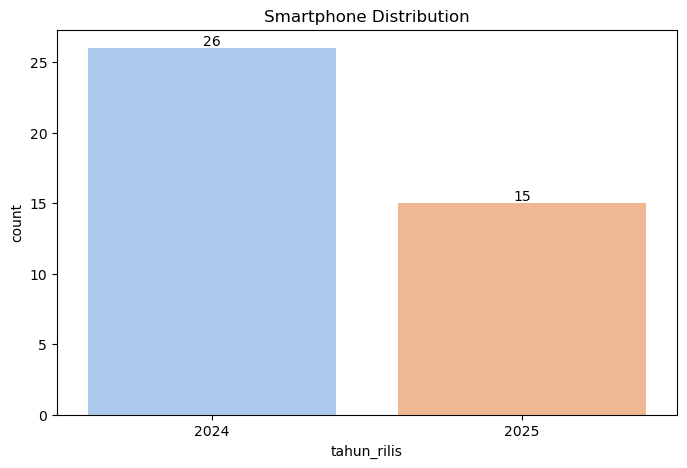

In [25]:
# Create canvas
plt.figure(figsize=(8, 5))
        
# Countplot
sns.countplot(x=df_spec.tahun_rilis, palette='pastel')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Smartphone Distribution')
plt.show()


Terlihat bahwa untuk smartphone yang rilis pada 2024 yang terdapat pada dataset ini ada sebanyak 26 tipe dan untuk smartphone yang akan rilis di 2025 terdapat 15 tipe. Selanjutnya kita akan lebih spesifikkan lagi untuk melihat merek apa saja yang ada dalam dataset ini.

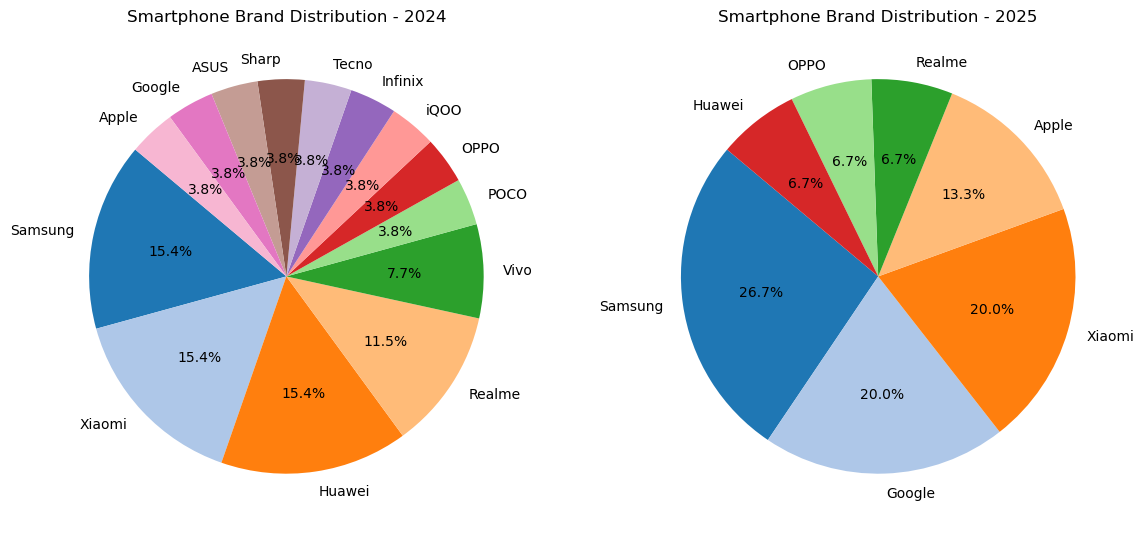

In [26]:
# Filter data berdasarkan tahun
data_2024 = df_spec[df_spec['tahun_rilis'] == 2024]
data_2025 = df_spec[df_spec['tahun_rilis'] == 2025] 

# Hitung distribusi merek
merek_counts_2024 = data_2024['merek'].value_counts()
merek_counts_2025 = data_2025['merek'].value_counts()

# Plot Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie Chart untuk 2024
axes[0].pie(merek_counts_2024, labels=merek_counts_2024.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
axes[0].set_title('Smartphone Brand Distribution - 2024')

# Pie Chart untuk 2025 (akan kosong jika tidak ada data)
if not merek_counts_2025.empty:
    axes[1].pie(merek_counts_2025, labels=merek_counts_2025.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    axes[1].set_title('Smartphone Brand Distribution - 2025')
else:
    axes[1].text(0.5, 0.5, 'No Data for 2025', horizontalalignment='center', verticalalignment='center', fontsize=14)
    axes[1].set_title('Smartphone Brand Distribution - 2025')
    axes[1].axis('off')

plt.show()

Terlihat bahwa merek smartphone yang tersedia dalam dataset adalah seperti Samsung, Xiaomi, Huawei, dan lainnya yang dapat dilihat dalam grafik tersebut.

Selanjutnya kita akan lihat bagaimana rentang harga untuk setiap segmen.

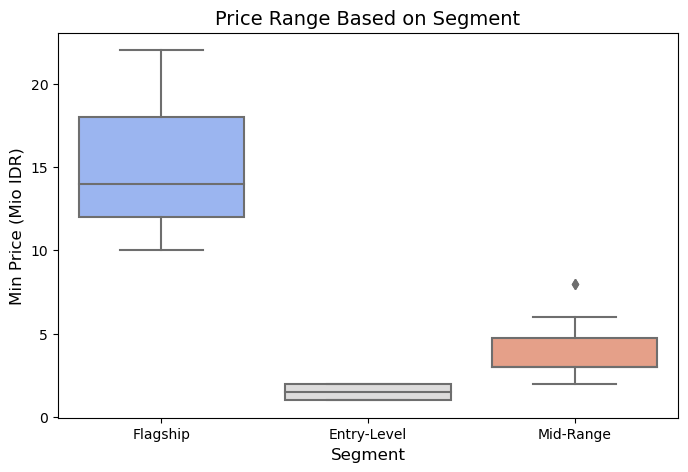

In [27]:
# Tambahkan kolom range harga numerik
df_spec['harga_min'] = df_spec['range_harga'].str.extract(r'Rp (\d+)', expand=False).astype(float)

# Visualisasi boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_spec, x="segmen", y="harga_min", palette="coolwarm")
plt.title("Price Range Based on Segment", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Min Price (Mio IDR)", fontsize=12)
plt.show()


Dalam data yang digunakan dalam pembuatan model, kita memiliki beberapa jenis tipe smartphone dengan range harga sebagai berikut.

- Flagship: Ponsel flagship memiliki rentang harga yang cukup tinggi, dengan harga minimum umumnya di atas 10 juta Rupiah. Ini menunjukkan bahwa ponsel flagship umumnya diposisikan sebagai produk premium dengan fitur-fitur canggih dan teknologi terbaru.
- Entry-Level: Sebaliknya, ponsel entry-level memiliki harga minimum yang jauh lebih rendah, bahkan di bawah 2 juta Rupiah. 
- Mid-Range: Ponsel mid-range memiliki posisi di antara keduanya. Harga minimumnya umumnya berada di kisaran 5-10 juta Rupiah. 

-------------------

# v. Feature Engineering

## Text Preprocessing

Berdasarkan EDA yang telah dilakukan, terdapat beberapa tindakan yang dapat dilakukan untuk membersihkan teks sehingga dapat meningkatkan performa dalam **Modeling**, yaitu
- *Case folding*: membuat semua kata dalam kondisi *lower* agar mudah di analisis. Jika terdapat perbedaan *Case folding* dana kata tersebut sama, maka akan dianggap 2 kata yang berbeda oleh mesin.
- *Mention removal*: menghapus simbol @ yang biasa digunakan dalam memanggil suatu akun.
- *Hashtags removal*: menghapus # yang biasa digunakan sebagai keyword dalam suatu narasi kalimat.
- *Newline removal (\n)*: menghapus kondisi baris yang terdapat *Newline* yang mengakibatkan mesin tidak dapat bekerja secara efisien dalam menganalisis.
- *Whitespace removal*: menghapus suatu baris yang memiliki *space* yang besar.
- *URL removal*: menghapus suatu baris yang yang mencantumkan link website.
- *Non-letter removal*: menghapus karakter yang berupa simbol seperti yang tadi sempat muncul secara jelas ketika EDA.
- *replace slang*: mengganti istilah kata gaul dan singkatan menjadi kata dasar. 
- *Stopwords removal*: menghapus kata sifat dan subjek yang tidak dibutuhkan dalam teks sehingga meningkatkan performa ketika *modeling*.
- *Lemmatizing*: mengubah kata kerja berimbuhan ke dalam bentuk dasar.

In [28]:
def load_slang_txt(file_path):
    slang_dict_txt = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        file_content = file.read()  
        try:
            # Try loading the content as JSON
            slang_dict_txt = json.loads(file_content)
        except json.JSONDecodeError:
            print(f"Error decoding JSON in the file: {file_path}")
    return slang_dict_txt


slang_txt_path = 'combined_slang_words.txt'
slang_dict_txt = load_slang_txt(slang_txt_path)

def load_slang_csv(file_path):
    
    slang_df = pd.read_csv(file_path, encoding='ISO-8859-1') 
    print(slang_df.columns)  
    
    return dict(zip(slang_df.iloc[:, 0], slang_df.iloc[:, 1])) 


slang_csv_path = 'new_kamusalay.csv'
slang_dict_csv = load_slang_csv(slang_csv_path)

# mengganti istilah gaul dan singkatan kata
slang_dict_tambahan = {
    "gw": "saya", "mau": "ingin", "ni": "ini", "aja": "saja", "gak": "tidak", "bgt": "sangat",
    "klo": "kalau", "bgs": "bagus", "masi": "masih", "msh": "masih", "lom": "belum",
    "blm": "belum", "ap": "apa", "brg": "barang", "ad": "ada", "blom": "belum",
    "kebli": "kebeli", "tp": "tapi", "org": "orang", "tdk": "tidak", "yg": "yang",
    "kalo": "kalau", "sy": "saya", "bng": "abang", "bg": "abang", "fto": "foto",
    "spek": "spesifikasi", "cm": "cuma", "jg": "juga", "pd": "pada", "skrg": "sekarang",
    "ga": "tidak", "gk": "tidak", "batre": "baterai", "gue": "saya", "dpt": "dapat",
    "kek": "seperti", "mna": "mana", "mnding": "mending", "mend": "mending",
    "dr": "dari", "sma": "sama", "drpada": "daripada"
}

slang_dict = {**slang_dict_tambahan, **slang_dict_txt, **slang_dict_csv}

# Stopwords (Adjusted)
stpwds_id = list(set(stopwords.words('indonesian')))

retain_words = ['baru', 'lama', 'sama', 'tapi', 'tidak', 'dari', 'belum', 'bagi', 'mau', 'masalah']
for word in retain_words:
    if word in stpwds_id:
        stpwds_id.remove(word)


lemmatizer = WordNetLemmatizer()

def replace_slang(text, slang_dict):
    
    slang_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in slang_dict.keys()) + r')\b')
    
    
    return slang_pattern.sub(lambda x: slang_dict[x.group()], text)

Index(['anakjakartaasikasik', 'anak jakarta asyik asyik'], dtype='object')


In [29]:


factory = StemmerFactory()
stemmer = factory.create_stemmer()


stemming_exceptions = {"terasa": "terasa", "sat": "cepat", "set": "cepat"}
informal_phrases = {"sat set sat set": "cepat", "ya mas": ""}

def replace_slang_in_text(text, slang_dict):
    words = text.split()  
    replaced_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(replaced_words)

def text_preprocessing(text, slang_dict):
    # Case folding (convert text to lowercase)
    text = text.lower()

    # Mention, hashtag, and newline removal
    text = re.sub("@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|\\n", " ", text)

    # Whitespace removal
    text = text.strip()

    # URL removal
    text = re.sub(r"http\S+|www.\S+", " ", text)

    # Non-letter and number removal
    text = re.sub(r"[^\w\s']+", " ", text)

    # Replace informal phrases
    for phrase, replacement in informal_phrases.items():
        text = text.replace(phrase, replacement)

    # Replace slang terms
    text = replace_slang_in_text(text, slang_dict)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords (assuming stpwds_id is your stopword list)
    tokens = [word for word in tokens if word not in stpwds_id]

    # Stemming with exception handling
    tokens = [
        stemming_exceptions[word] if word in stemming_exceptions else stemmer.stem(word)
        for word in tokens
    ]
    
    # Post-process to remove duplicates
    tokens = list(dict.fromkeys(tokens))

    # Reassemble the text
    text = ' '.join(tokens)

    return text


In [30]:
# Applying Text Preprocessing to the Dataset

df['text_processed'] = df['comment'].apply(lambda x: text_preprocessing(x, slang_dict_csv))
df

,author,id,comment,sentiment,timestamp,like_count,tipe_produk,brand,segment,release_date,text_processed
0,@rinzia2346,1,batre 5000 mah kerasa kurang awet ga sih di hp...,negative,2024-10-23 05:11:29+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,baterai 5000 rasa awet tidak sih handphone 12n...
1,@LiriklaguKu-x8s,2,"Bang kok punya ku g ada fitur nfc nya, solusin...",negative,2024-11-04 10:29:48+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,bang ku tidak fitur nfc nya solusi dongssss
2,@encischannel9849,3,Gue juga pake tekno spark 20c tp ko g ada nfc ya,neutral,2024-09-11 15:30:53+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,gue pakai teknologi spark 20c tidak nfc ya
3,@WelderIjo,4,hp dont play pubg nih,neutral,2024-05-03 12:14:37+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,handphone do not play pubg nih
4,@edybaskorobaskoro9660,5,Frame dropnya kok keliatan parah gitu ? Jauh s...,negative,2024-02-29 18:19:10+00:00,0,Tecno Spark 20C,Tecno,Entry-Level,24-Jan,frame drop parah sama sih zte vita 40
...,...,...,...,...,...,...,...,...,...,...,...
3317,@leotravel85,3318,"Saya ingin baterai yang lebih besar, bukan pon...",negative,2024-11-04 09:32:52+00:00,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025,baterai ponsel tipis bodoh
3318,@skeletor7708,3319,Berikan saya Samsung Galaxy Ultra 6.1 inci den...,negative,2024-11-04 09:16:53+00:00,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025,samsung galaxy ultra 6 1 inci spesifikasi hila...
3319,@Jz-fj5ki,3320,Samsung BAWA PANEL LAYAR M14 UNTUK S25 ULTRA s...,positive,2024-11-04 09:02:43+00:00,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025,samsung bawa panel layar m14 s25 ultra iphone ...
3320,@Jz-fj5ki,3321,"Ponsel tipis adalah yang terburuk, selalu rent...",negative,2024-11-04 08:58:32+00:00,0,Galaxy S25 Slim,Samsung,Flagship,Mid-2025,ponsel tipis buruk rentan keluh layar perangka...


In [31]:
df['text_processed'].apply(lambda x: len(x.split())).describe()

count    3322.000000
mean        8.062312
std         7.807456
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       177.000000
Name: text_processed, dtype: float64

In [32]:
df['text_processed'] = df['text_processed'].apply(lambda x: x if len(x.split()) > 0 else None)
df = df.dropna(subset=['text_processed'])
df['text_processed'].apply(lambda x: len(x.split())).describe()

count    3297.000000
mean        8.123446
std         7.805252
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       177.000000
Name: text_processed, dtype: float64

## Label Encoding

> Label encoding bertujuan untuk mengubah values ke bentuk diskrit sehingga memudahkan dalam *modeling*.

In [33]:
# Display Target

df['sentiment'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

In [34]:
# Change Target into Number

df['target'] = df['sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})


In [35]:
example_index = 42  
print("Original Text:", df['comment'].iloc[example_index])
print("Processed Text:", df['text_processed'].iloc[example_index])

Original Text: Baru beli buat hape ke 2. Tapi kenapa Helio G85 berasa lemot ya mas? Punya ibu saya Galaxy A22 Helio G80 berasa lebih sat set sat set. Sama sama 128gb. Yg A06 punya saya berasa patah patah dan ada loading klo buka aplikasi. Padahal aplikasi juga ga banyak cuma ada sosmed sama wa kantor kerjaan
Processed Text: baru beli telepon genggam 2 tapi hio g85 asa lot galaxy a22 g80 cepat sama 128gb a06 patah loading buka aplikasi tidak media sosial wa kantor kerja


## Missing Values

> Membersihkan *missing values* pada dataset bertujuan untuk mengoptimalkan *modeling* sehingga ketika dievaluasi menghasilkan nilai metrik yang tinggi. *Missing values* dilakukan setelah text preprocessing untuk menghindari timbulnya cell yang kosong atau duplikat setelah dilakukan pembersihan kata dalam teks.

In [36]:
# periksa missing values sebelum di handle
df.isnull().sum()

author            0
id                0
comment           0
sentiment         0
timestamp         0
like_count        0
tipe_produk       0
brand             0
segment           0
release_date      0
text_processed    0
target            0
dtype: int64

In [37]:
df.dropna(inplace=True)
df.isnull().sum()

author            0
id                0
comment           0
sentiment         0
timestamp         0
like_count        0
tipe_produk       0
brand             0
segment           0
release_date      0
text_processed    0
target            0
dtype: int64

## Data Splitting

> Data Splitting bertujuan memudahkan model ketika berlatih hingga diuji.

In [38]:
# Data Splitting
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df.text_processed,
    df.target,
    test_size=0.15,
    random_state=20,
    stratify=df.target
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.10,
    random_state=20,
    stratify=y_train_val
)

print('Train Size :', X_train.shape)
print('Val Size   :', X_val.shape)
print('Test Size  :', X_test.shape)

# Check Missing Values
print("Missing values in Train:", X_train.isnull().sum())
print("Missing values in Val:", X_val.isnull().sum())
print("Missing values in Test:", X_test.isnull().sum())

print("Class Distribution in Train Set:")
print(y_train.value_counts())
print("Class Distribution in Validation Set:")
print(y_val.value_counts())
print("Class Distribution in Test Set:")
print(y_test.value_counts())

Train Size : (2521,)
Val Size   : (281,)
Test Size  : (495,)
Missing values in Train: 0
Missing values in Val: 0
Missing values in Test: 0
Class Distribution in Train Set:
0    1182
1     761
2     578
Name: target, dtype: int64
Class Distribution in Validation Set:
0    132
1     85
2     64
Name: target, dtype: int64
Class Distribution in Test Set:
0    232
1    149
2    114
Name: target, dtype: int64


In [39]:
vectorizer = CountVectorizer(max_features=7000)

X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

print(X_train_vec.shape, X_val_vec.shape, X_test_vec.shape)

(2521, 3637) (281, 3637) (495, 3637)


-------------------

# vi. Bxploratory Data Analysis (After Feature Engineering)ase ModelE

# vii. Base Model

## Model Definition

In [40]:
tf.keras.backend.clear_session()

seed = 20
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(X_train_vec.shape[1],)))


model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))

model.add(tf.keras.layers.Dense(units=3, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               931328    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 974,659
Trainable params: 974,659
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [41]:
print("X_train_vec shape:", X_train_vec.shape)
print("y_train shape:", y_train.shape)
print("X_val_vec shape:", X_val_vec.shape)
print("y_val shape:", y_val.shape)

X_train_vec shape: (2521, 3637)
y_train shape: (2521,)
X_val_vec shape: (281, 3637)
y_val shape: (281,)


In [42]:
history = model.fit(
    X_train_vec, y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_val_vec, y_val),
    verbose=1
)

Epoch 1/30
253/253 [==============================] - 2s 3ms/step - loss: 0.9674 - accuracy: 0.5359 - val_loss: 0.8646 - val_accuracy: 0.5765
Epoch 2/30
253/253 [==============================] - 1s 2ms/step - loss: 0.5508 - accuracy: 0.7814 - val_loss: 1.0027 - val_accuracy: 0.5658
Epoch 3/30
253/253 [==============================] - 1s 2ms/step - loss: 0.2245 - accuracy: 0.9151 - val_loss: 1.3950 - val_accuracy: 0.5374
Epoch 4/30
253/253 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9556 - val_loss: 1.6831 - val_accuracy: 0.5445
Epoch 5/30
253/253 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9750 - val_loss: 1.9204 - val_accuracy: 0.5552
Epoch 6/30
253/253 [==============================] - 1s 2ms/step - loss: 0.0529 - accuracy: 0.9790 - val_loss: 2.2831 - val_accuracy: 0.5125
Epoch 7/30
253/253 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.9849 - val_loss: 2.2412 - val_accuracy: 0.5480
Epoch 

## Model Evaluation

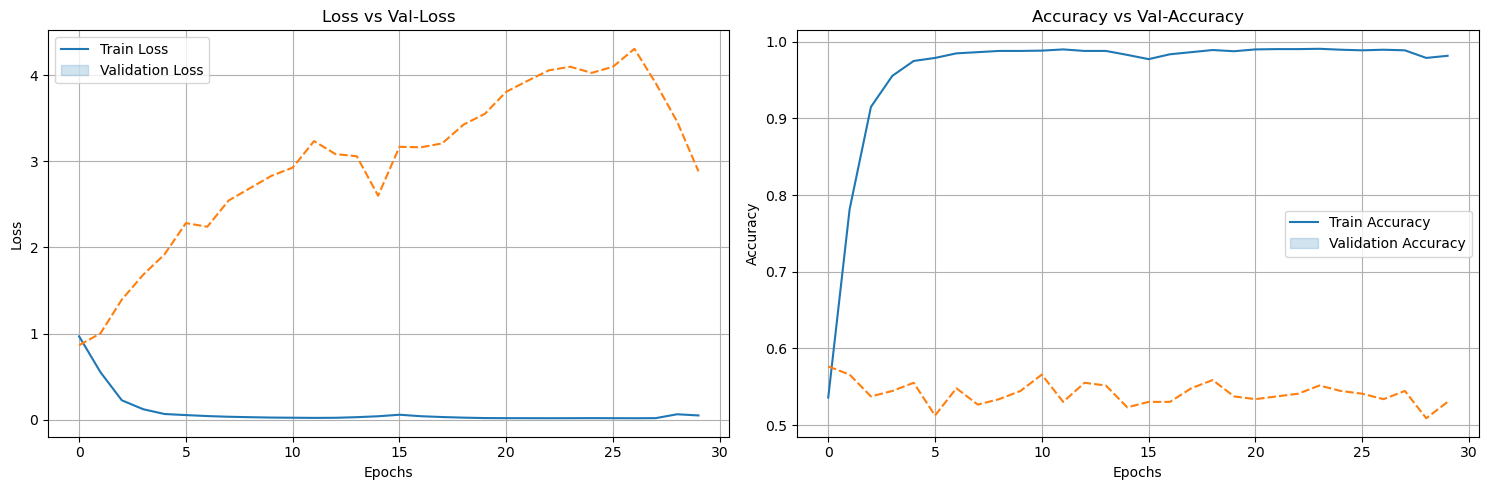

In [43]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Val-Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Val-Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid()

plt.tight_layout()
plt.show()

ANN Training (Base)


,precision,recall,f1-score,support
0,0.629310,0.553030,0.588710,132.0
1,0.541176,0.541176,0.541176,85.0
2,0.375000,0.468750,0.416667,64.0
macro avg,0.515162,0.520986,0.515518,281.0
weighted avg,0.544729,0.530249,0.535147,281.0
accuracy,0.530249,NaN,NaN,NaN


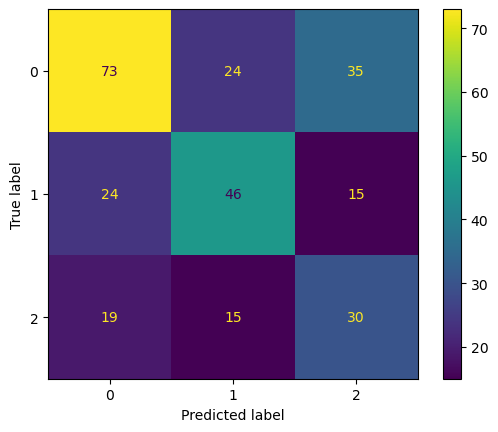

In [44]:
#making predictions
val_predictions = model.predict(X_val_vec)
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, val_predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classification Report as DataFrame
report_dict = classification_report(y_val, val_predictions_classes, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Add Validation Accuracy to the DataFrame
accuracy = accuracy_score(y_val, val_predictions_classes)
report_df = report_df.drop('accuracy', axis=0)
report_df.loc['accuracy'] = [accuracy, None, None, None]

# Display the report DataFrame
print("ANN Training (Base)")
display(report_df)

# viii. Model Improvement

## Model Definition

In [45]:
X_train

2493                                              infinix
3289    guna xiaomi 14t plus 1 gaming kencang kanan 2 ...
249                      bentuk nya kayak rog phone 8 pro
847                      bagus infinix zero 30 note 40 ya
1291    5g voltenya bang tidak root tapi lihat website...
                              ...                        
3017    beli produk injak 2 harga negara satu republik...
967     bismilah tabung moga rezeki beli handphone viv...
1014    lama banget beli merek jejepangan riwayat jepa...
1200                                     gaji 2tahun baru
1289                     gempur iphone tapi google pixel 
Name: text_processed, Length: 2521, dtype: object

In [46]:
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')
bert_model = TFBertModel.from_pretrained('indolem/indobert-base-uncased', from_pt=True)


def tokenize_input(texts):
    return tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='tf'
    )

X_train_list = X_train.tolist()
X_val_list = X_val.tolist()
X_test_list = X_test.tolist()



X_train_tokenized = tokenize_input(X_train_list)
X_val_tokenized = tokenize_input(X_val_list)
X_test_tokenized = tokenize_input(X_test_list)




Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predict

In [47]:

tf.keras.backend.clear_session()

input_ids = Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(128,), dtype=tf.int32, name='attention_mask')

bert_output = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = bert_output.pooler_output

dropout = layers.Dropout(0.3)(pooled_output)

dense = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout)
dropout2 = layers.Dropout(0.3)(dense)

output = layers.Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout2)

model_bert = Model(inputs=[input_ids, attention_mask], outputs=output)

model_bert.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model_bert.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 128)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 110558208   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout (Dropout)               (None, 768)          0           tf_bert_model[0][1]          

## Model Training

In [ ]:


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-5
)


history_bert = model_bert.fit(
            {
                'input_ids': X_train_tokenized['input_ids'], 
                'attention_mask': X_train_tokenized['attention_mask']
            },
            y_train,
            validation_data=(
                {
                    'input_ids': X_val_tokenized['input_ids'], 
                    'attention_mask': X_val_tokenized['attention_mask']
                },
                y_val
            ),
            epochs=30,
            batch_size=4,
            callbacks=[reduce_lr],  
            verbose=1
        )

Epoch 1/30
631/631 [==============================] - 264s 398ms/step - loss: 2.0348 - accuracy: 0.4518 - val_loss: 1.3134 - val_accuracy: 0.4698
Epoch 2/30
631/631 [==============================] - ETA: 0s - loss: 1.1875 - accuracy: 0.4649

## Model Evaluation

In [ ]:
history_bert_df = pd.DataFrame(history_bert.history)

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history_bert_df[['loss', 'val_loss']])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Val-Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history_bert_df[['accuracy', 'val_accuracy']])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Val-Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions with the IndoBERT model
val_predictions = model_bert.predict(X_val_tokenized)

# Convert probabilities to class labels
val_predictions_classes = tf.argmax(val_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, val_predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classification Report as DataFrame
report_bert_dict = classification_report(y_val, val_predictions_classes, output_dict=True)
report_bert_df = pd.DataFrame(report_bert_dict).transpose()

# Add Validation Accuracy to the DataFrame
accuracy = accuracy_score(y_val, val_predictions_classes)
report_bert_df = report_bert_df.drop('accuracy', axis=0)
report_bert_df.loc['accuracy'] = [accuracy, None, None, None]

# Display the report DataFrame
print("IndoBERT Model Training")
display(report_bert_df)


-------------------

# ix. Model Saving

In [ ]:
""" #save into file
with open('model.pkl', 'wb') as file_1:
    pickle.dump (model, file_1)
with open('model_scaler.pkl', 'wb') as file_2:
    pickle.dump (scaler, file_2)
with open('model_encoder.pkl', 'wb') as file_3:
    pickle.dump (encoder, file_3)
with open('num_col.txt', 'w') as file_4:
    json.dump (num_col, file_4)
with open('cat_col.txt', 'w') as file_5:
    json.dump (cat_col, file_5)
with open('area_mapping.json', 'w') as file_6:
    json.dump(area_freq, file_6) """

-------------------

# x. Model Inference

-------------------

# xi. Kesimpulan

**Rekomendasi langkah selanjutnya**

-------------------